<a href="https://colab.research.google.com/github/ankush-kukde/Titanic-Survival-Report/blob/main/Titanic_Survival_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
titanic_data= pd.read_csv('/content/titanic_train.csv')
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


<Axes: xlabel='Survived', ylabel='count'>

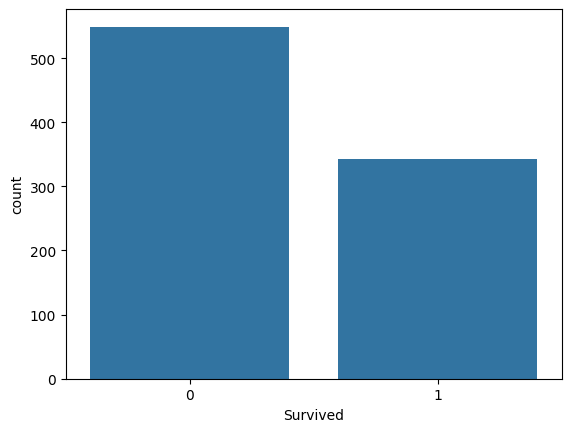

In [7]:
#Number of People suvived
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

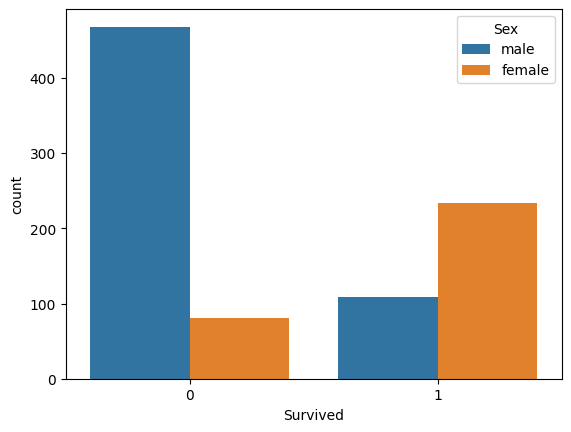

In [12]:
#Male V/s Female
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [14]:
#Check if there are any null values
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

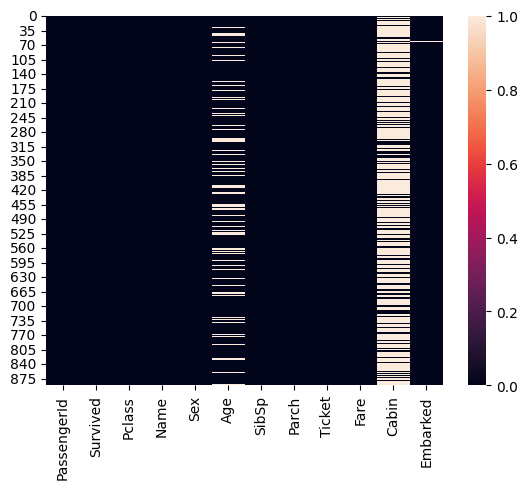

In [17]:
#Vilzualisation
sns.heatmap(titanic_data.isna())

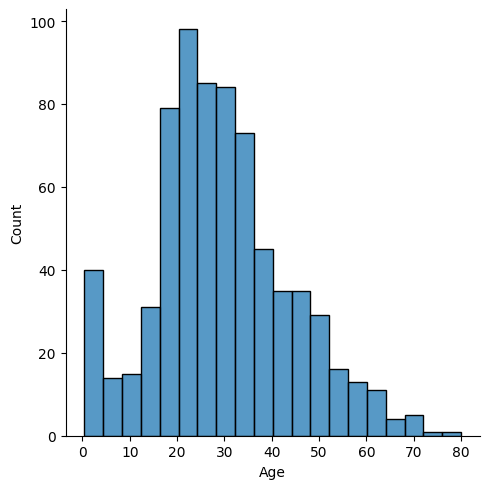

In [19]:
sns.displot(x='Age',data=titanic_data)

In [46]:
#filling the blank ages
mean_age=titanic_data['Age'].mean()
titanic_data['Age'].fillna(mean_age , inplace=True)

#just to check
titanic_data['Age'].isna().sum()

0

We have to drop cabin cooumn due very high number of na values.

In [ ]:
#Convert sex coloumn to numbers for our ease
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [30]:
#Add this coloumn of gender in our data set
titanic_data['Gender']=gender

In [ ]:
#Droppping the coloumns that are not usefull for plotting :-Name , Sex,Ticket,Embarked

titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)



In [49]:
#Let's check
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [53]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']


**DATA MODELLING**

In [56]:
#import train testsplit method
from sklearn.model_selection import train_test_split


In [57]:
#train text split
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.33 , random_state=42)


In [58]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#Fit Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
#predicting
predict=lr.predict(x_test)


In [61]:
#Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted NO','Predicted YES'], index=['Actual NO','Actual YES'])

,Predicted NO,Predicted YES
Actual NO,151,24
Actual YES,37,83


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

